<a href="https://colab.research.google.com/github/govardhan-06/practice-Notebooks/blob/main/Handling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###Missing Data At Random (MCAR)
No relationshp between missing data and other details

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Missing Data Not At Random (MNAR) ; Systematic Missing Values

There is relation between missing data and other details

In [15]:
import numpy as np
df['Cabin_Null']=np.where(df['Cabin'].isnull(),1,0)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [17]:
df.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

###Missing At Random (MAR)

eg: Men hiding salary details, women hiding their age from surveys

###Technique for handling missing values

1. Mean, Median, Mode Replacement
2. Random sample imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitary Imputation
6. Frequent category imputation

###Mean Median Mode Imputation
* Used in th case of `MCAR`
* Use `median`, `mode` when outliers are there

In [18]:
 df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
def inpute_nan(df,variable,median):
    df[variable+'_Median']=df[variable].fillna(median)

In [20]:
median=df.Age.median()
median

28.0

In [22]:
inpute_nan(df,'Age',median)

In [23]:
df.head()

,Survived,Age,Fare,Age_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [24]:
df.describe()

,Survived,Age,Fare,Age_Median
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,29.361582
std,0.486592,14.526497,49.693429,13.019697
min,0.000000,0.420000,0.000000,0.420000
25%,0.000000,20.125000,7.910400,22.000000
50%,0.000000,28.000000,14.454200,28.000000
75%,1.000000,38.000000,31.000000,35.000000
max,1.000000,80.000000,512.329200,80.000000


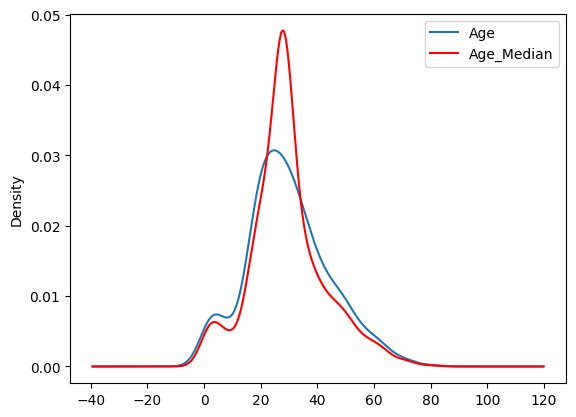

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_Median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

###Random Sample Imputation
* It takes up random values from the dataset and replace the null alues with this randomly picked data

In [27]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [29]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [33]:
df["Age"].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [34]:
median=df.Age.median()
median

28.0

In [35]:
def inpute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas allow merging for only same indices
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [36]:
inpute_nan(df,'Age',median)

In [37]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0
